In [110]:
import pandas as pd
import os
import spacy
import seaborn as sns
import matplotlib.pyplot as plt

In [111]:
df = pd.read_csv(os.path.join("data","with_sentiment.csv"), index_col=0)

In [117]:
df.head()

,User,Date Created,Number of Likes,Source of Tweet,Tweet,negative,positive
49952,Gaby93Gaby,2021-06-01 06:06:21+00:00,0,Twitter for Android,@OnsOranje @ingnl @Rijkswaterstaat @GemeenteEd...,0.000441,0.999559
49951,ingnl,2021-06-01 06:07:16+00:00,1,Coosto,@stephanbackus @knab_nl @INGnl_OS @Rabobank Sp...,0.000397,0.999602
49949,Grippie13,2021-06-01 06:27:12+00:00,0,Twitter for iPhone,@ingnl elke morgen jullie irritante reclame op...,0.996405,0.003595
49948,Grippie13,2021-06-01 06:32:16+00:00,0,Twitter for iPhone,@ingnl En beleggen is verschrikkelijk riskant....,0.998612,0.001388
49947,edwinijsman,2021-06-01 09:00:17+00:00,0,Twidere for Android,@PolitiekDelftnl @PPDelft @ingnl Het wachtwoor...,0.001508,0.998492


# Exploration

We want to find out what people are writing about ING. Can we use this data to see how we can improve our services. Especially in finding n

In [113]:
df["Date Created"] = pd.to_datetime(df["Date Created"])
df = df.sort_values("Date Created")

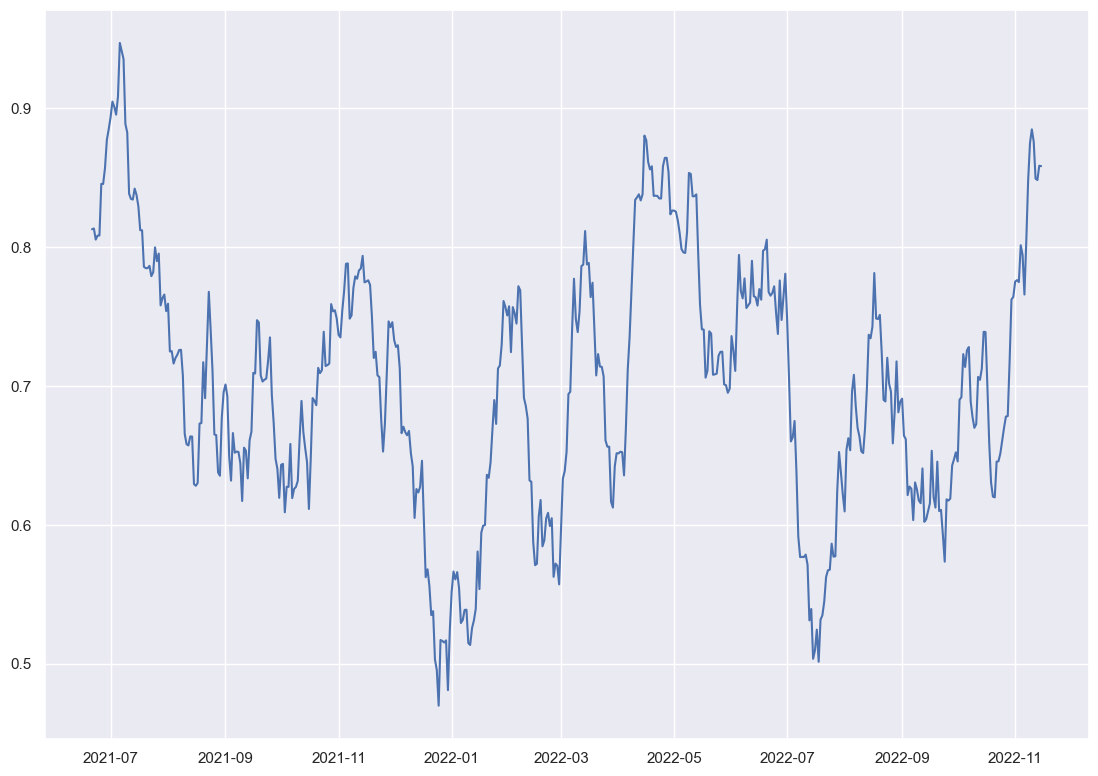

In [116]:
plt.figure(figsize=(12, 9))
plt.style.use('fivethirtyeight')
sns.set()
print(plt.plot(df.groupby(pd.Grouper(key='Date Created',freq='D'))["positive"].median().rolling(21).mean()))

/var/folders/vf/4t46plyn5x31c94wb535ryhw0000gq/T/ipykernel_1643/4093651289.py:5: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  print(plt.plot(df[df["Tweet"].str.contains(token)].groupby(pd.Grouper(key='Date Created',freq='D')).sum()["negative"]))


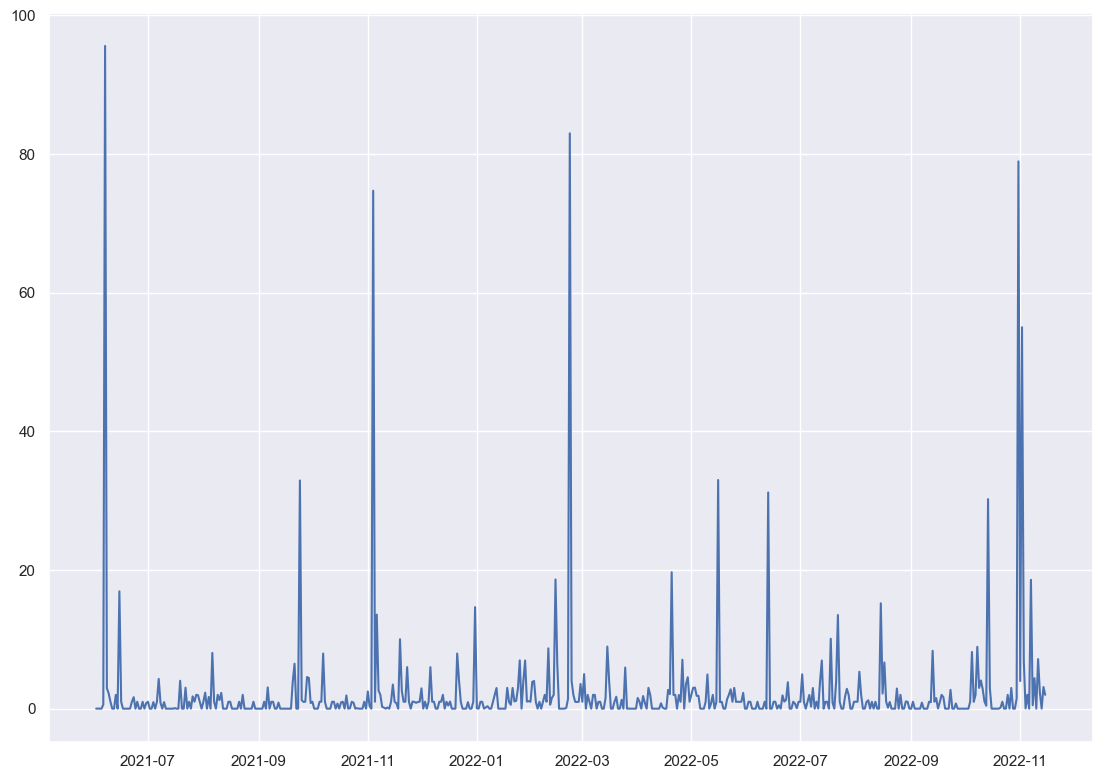

In [95]:
def token_over_time(token):
    plt.figure(figsize=(12, 9))
    plt.style.use('fivethirtyeight')
    sns.set()
    print(plt.plot(df[df["Tweet"].str.contains(token)].groupby(pd.Grouper(key='Date Created',freq='D')).sum()["negative"]))
token_over_time("storing")

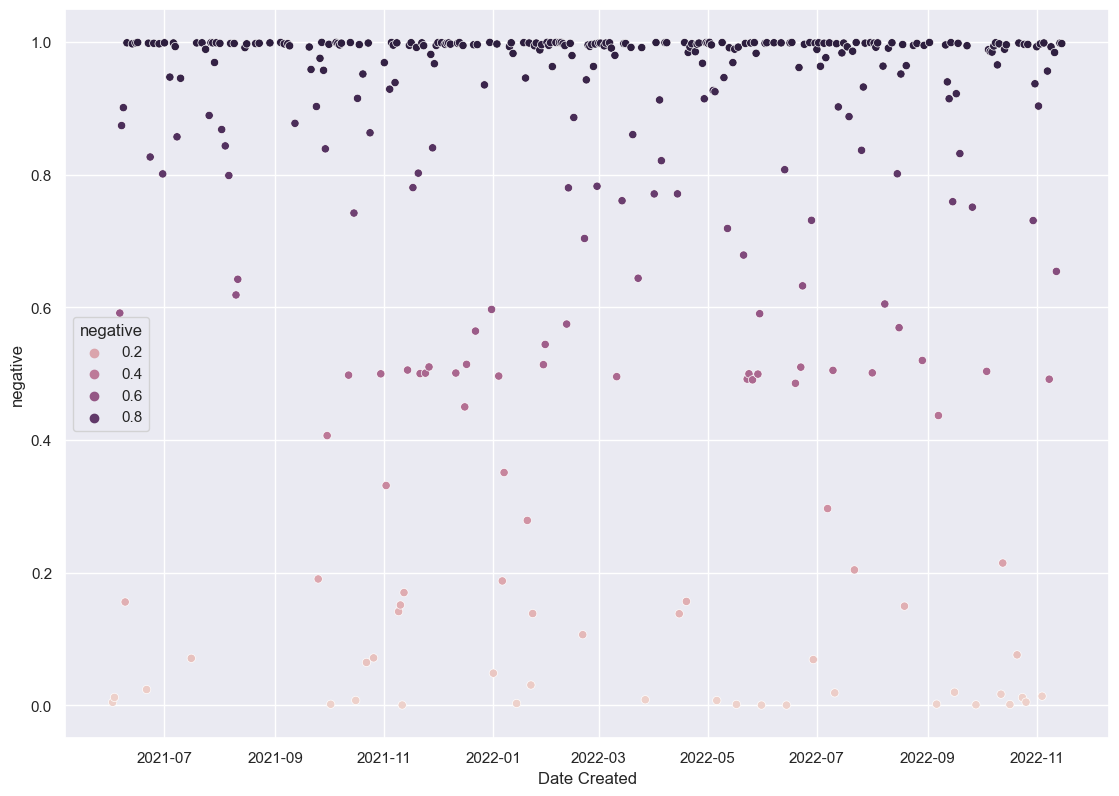

In [96]:
def sentiment_over_time(token):
    plt.figure(figsize=(12, 9))
    plt.style.use('fivethirtyeight')
    sns.set()
    sns.scatterplot(data=df[df["Tweet"].str.contains(token)].groupby(pd.Grouper(key='Date Created',freq='D'))["negative"].median().reset_index(), x="Date Created", y="negative", hue="negative")
    
sentiment_over_time("storing")

In [15]:
nlp = spacy.load("nl_core_news_sm")

In [54]:
df["noun_phrases"] = [[chunk.text for chunk in nlp(t).noun_chunks] for t in df["Tweet"].tolist()]

In [48]:
def get_label(x):
    if x <0.35:
        return "pos"
    elif x > 0.65:
        return "neg"
    return "neu"

df["label"] = df["negative"].apply(lambda x: get_label(x))

<AxesSubplot: ylabel='Tweet'>

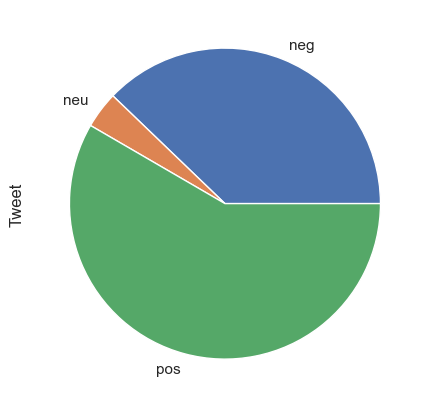

In [57]:
df.groupby("label").count()["Tweet"].plot.pie()

In [68]:
from collections import defaultdict

all_noun_phrases = defaultdict(lambda: defaultdict(int))
for noun_phrases_list, label in zip(df["noun_phrases"].tolist(),df["label"].tolist()) :
    for noun_phrase in noun_phrases_list:
        all_noun_phrases[noun_phrase][label] += 1
   

In [73]:
for k in all_noun_phrases:
    try:
        ratio = all_noun_phrases[k]["neg"] / all_noun_phrases[k]["pos"]
    except ZeroDivisionError:
        ratio = 0
    all_noun_phrases[k]["ratio"] = ratio

defaultdict(int, {'neg': 268, 'pos': 125, 'neu': 16, 'ratio': 2.144})

In [92]:
sorted_keys = sorted([(k, all_noun_phrases[k]["ratio"]) for k in all_noun_phrases], key=lambda tup: tup[1], reverse=True)[:50]
print("{:<25} -> {:<10} {:<10} {:<10}".format("token", "negative","positive", "ratio"))
for k,r in sorted_keys:
    print("{:<25} -> {:<10} {:<10} {:<10}".format(k, all_noun_phrases[k]["neg"],all_noun_phrases[k]["pos"],all_noun_phrases[k]["ratio"]))


token                     -> negative   positive   ratio     
geen reactie              -> 29         2          14.5      
Probleem                  -> 14         1          14.0      
de pagina                 -> 21         2          10.5      
dit probleem              -> 51         5          10.2      
verbinding                -> 10         1          10.0      
de computer               -> 10         1          10.0      
de zoveelste storing      -> 9          1          9.0       
gebruikersnaam            -> 9          1          9.0       
adreswijziging            -> 9          1          9.0       
de plank                  -> 9          1          9.0       
de laatste update         -> 9          1          9.0       
Telefoon                  -> 9          1          9.0       
gister                    -> 9          1          9.0       
het betaalpakket          -> 9          1          9.0       
geen zin                  -> 33         4          8.25      
afschrij

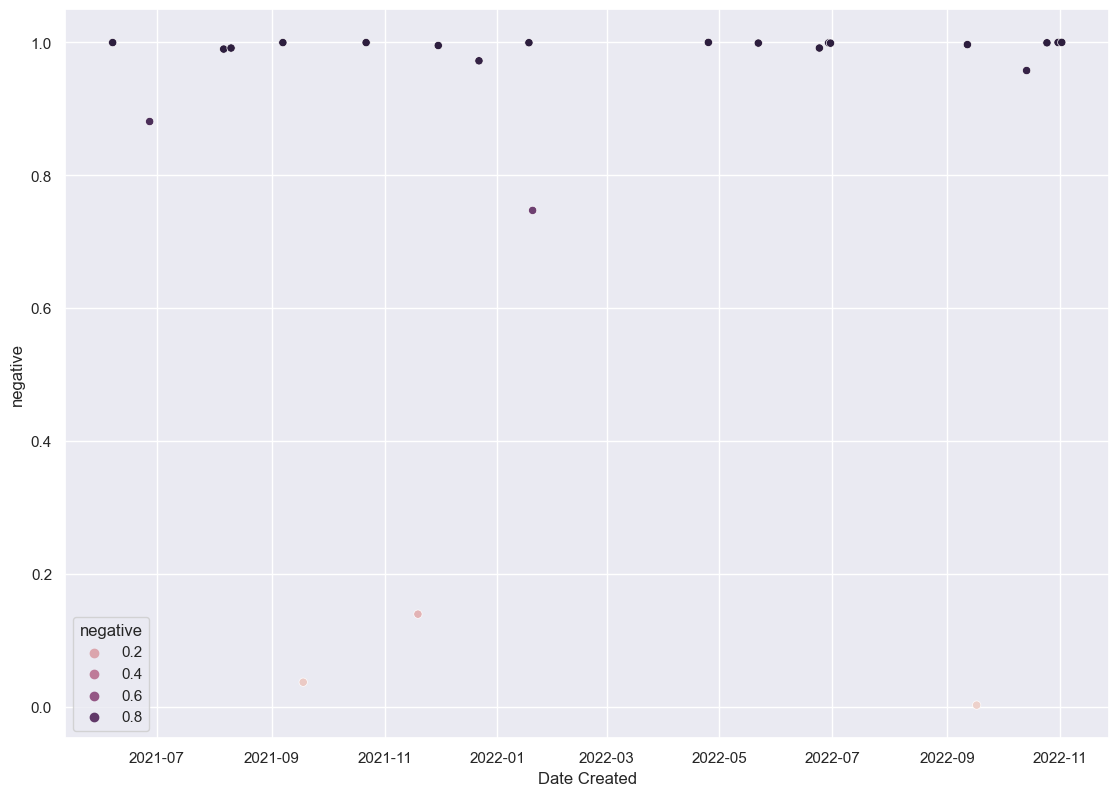

In [104]:
sentiment_over_time("geen betalingen")

In [105]:
df[df["Tweet"].str.contains("geen betalingen")]["Tweet"].tolist()

['@ingnl Wat is er aan de hand?  De internetbankieren app werkt niet en ik kan geen betalingen doen!!! En omdat  het inloggen op internet naar de app verwijst kan ik helemaal niks!!!',
 '@ingnl Klopt het dat ik op dit moment geen betalingen kan doen met mijn creditcard online? Ik krijg namelijk steeds een authenticatiefout te zien. 😤',
 'Inmiddels is de storing bij @ingnl nog niet verholpen. De hele dag geen betalingen kunnen doen. Bijzonder vervelend als je druk bezig bent met diverse projecten. https://t.co/F2UC8uOjZb',
 '@ingnl Sinds wanneer kan ik in Oostenrijk geen betalingen met een cc meer doen? Lukte van de week al niet maar dacht dat het aan de website van het museum lag, maar inmiddels deed ook de website van het OV het niet, en de cc van een vriendin wel... hoe zet ik dit uit?!',
 '@ingnl Kan via app geen betalingen regelen en de rekeningen van mn kinderen zijn niet meer zichtbaar',
 '@ingnl ik krijg sinds gisteravond een foutmelding als ik geld wil in leggen op de toprekeni

In [ ]:
def get_tweets_period(period_from, period_to):
    mask = (df['Date Created'] > period_from) & (df['Date Created'] <= period_to)
    print(df[mask]["Tweet"].tolist())

get_tweets_period('2022-07-01','2022-07-29')